In [2]:
import matplotlib
import matplotlib.pyplot as plt
import rasterio
import fiona
from rasterio.mask import mask
import glob
import os
from matplotlib import gridspec

In [3]:
class classes:
    classes_MCD12Q1v6LCProp2 = ['Bkg',
        'Barren',
        'Water Bodies',
        'Urban and Built-up Lands',
        'Dense Forests',
        'Open Forests',
        'Natural Herbaceous',
        'Herbaceous Croplands',
        'Shrublands']

    colors_MCD12Q1v6LCProp2 = ['#ffffff','#f9ffa4', 
                               '#1c0dff', '#fa0000', '#003f00', 
                               '#006c00', '#b6ff05', 
                              '#f096ff', '#dcd159']

    short_MCD12Q1v6LCProp2 = ['Bkg','Ba', 
                                 'W', 'Bu', 'DF', 
                                'OF', 'NH', 
                              'HC', 'S']

In [4]:
def read_file_lc(raster, shape):
    with rasterio.open(raster) as src:
        out_image, out_transform = mask(src, shape, crop=True, invert=False, all_touched=False)
        out_image = out_image.squeeze()
        return out_image

In [5]:
colors = classes.colors_MCD12Q1v6LCProp2
labels = classes.classes_MCD12Q1v6LCProp2
n_labels = len(colors)-1

colormap = matplotlib.colors.LinearSegmentedColormap.from_list(range(n_labels), colors)

In [6]:
aoi_file = r'F:\acoca\research\gee\dataset\AMZ\implementation\aoi\amazon_raisg.shp'

# read files
with fiona.open(aoi_file, "r") as shapefile:
    aoi = [feature["geometry"] for feature in shapefile]

indir = r'F:\acoca\research\gee\dataset\AMZ\prediction'
outdir = r'E:\acocac\research\AMZ\img\c6\postprocesssing'

lc_raw = glob.glob(os.path.join(indir,'prediction','*.tif'))
lc_post = glob.glob(os.path.join(indir,'prediction_hmm','*.tif'))

In [ ]:
batch = list(range(0,19,4))

In [12]:
raw_array = [read_file_lc(x, aoi) for x in lc_raw]
post_array = [read_file_lc(x, aoi) for x in lc_post]

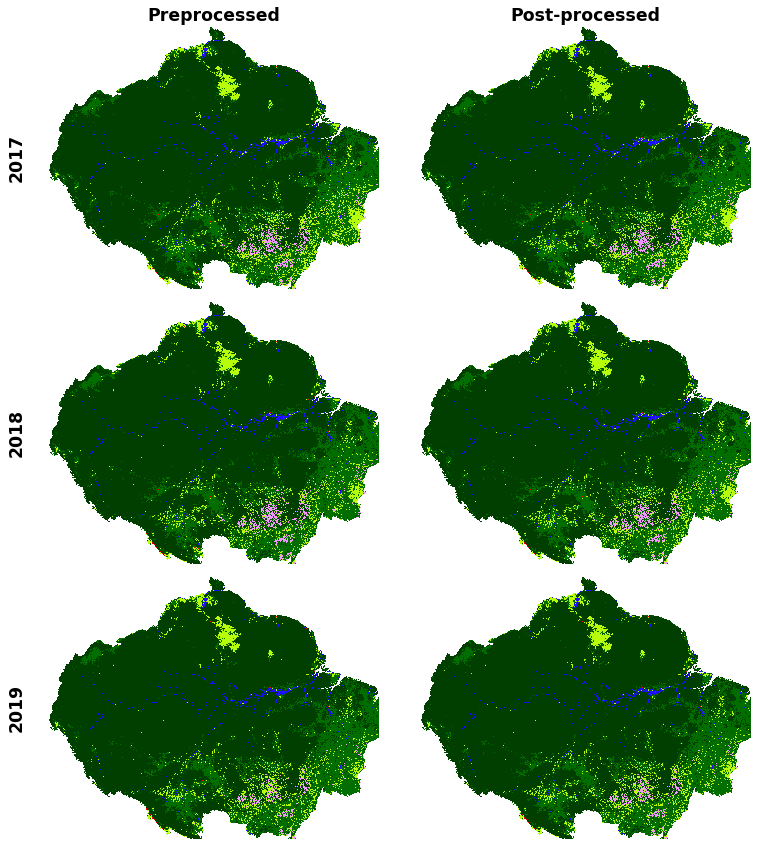

In [10]:
gs0 = gridspec.GridSpec(4, 2,  hspace=0.05, wspace=0.05, height_ratios= [1,1, 1, 1])
arrays_l1 = raw_array
arrays_l2 = post_array

fig = plt.figure(figsize=(13, 20), constrained_layout=False)

ymin = 2001
ymax = 2019

j = 16

for i in range(j,19):

    ax00 = fig.add_subplot(gs0[i-j, 0])
    ax01 = fig.add_subplot(gs0[i-j, 1])

    if i-j == 0:
        ax00.set_title('Preprocessed', fontsize='xx-large',  fontweight='bold')
        ax01.set_title('Post-processed', fontsize='xx-large',  fontweight='bold')

    ax00.annotate('20'+str(i+1).zfill(2),(-0.1,0.5), xycoords='axes fraction', ha='center', va='center', fontsize='xx-large', rotation=90, fontweight='bold')
    ax00.imshow(arrays_l1[i], cmap=colormap, interpolation='none', vmin=0, vmax=8)
    ax01.imshow(arrays_l2[i], cmap=colormap, interpolation='none', vmin=0, vmax=8)

    ax00.axis('off')
    ax01.axis('off')

    ax00.axes.get_yaxis().set_visible(True)

plt.show()

fig.savefig(os.path.join(outdir,'maps_{}to{}.png'.format(ymin,ymax)), bbox_inches='tight',pad_inches = 0, dpi=150)
plt.close()

In [118]:
raw_array2 = [raw_array[0], raw_array[-1]]
post_array2 = [post_array[0], post_array[-1]]

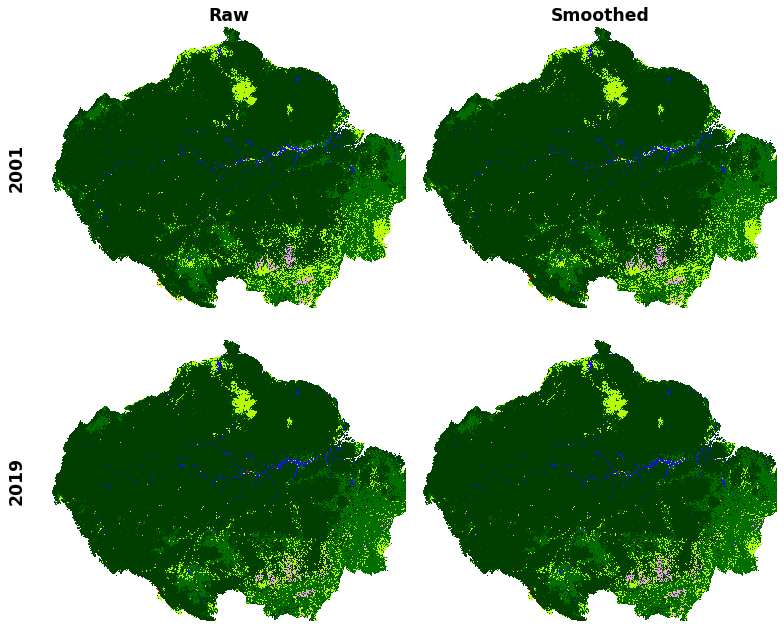

In [133]:
gs0 = gridspec.GridSpec(2, 2,  hspace=0.1, wspace=0.05, height_ratios= [1, 1])
arrays_l1 = raw_array2
arrays_l2 = post_array2

fig = plt.figure(figsize=(13, 11), constrained_layout=False)

ymin = 2001
ymax = 2019

for i in range(0,2):

    ax00 = fig.add_subplot(gs0[i, 0])
    ax01 = fig.add_subplot(gs0[i, 1])

    if i == 0:
        ax00.set_title('Raw', fontsize='xx-large',  fontweight='bold')
        ax01.set_title('Smoothed', fontsize='xx-large',  fontweight='bold')
        ax00.annotate('20'+str(i+1).zfill(2),(-0.1,0.5), xycoords='axes fraction', ha='center', va='center', fontsize='xx-large', rotation=90, fontweight='bold')
    else:
        ax00.annotate('20'+str(19).zfill(2),(-0.1,0.5), xycoords='axes fraction', ha='center', va='center', fontsize='xx-large', rotation=90, fontweight='bold')

    ax00.imshow(arrays_l1[i], cmap=colormap, interpolation='none', vmin=0, vmax=8)
    ax01.imshow(arrays_l2[i], cmap=colormap, interpolation='none', vmin=0, vmax=8)

    ax00.axis('off')
    ax01.axis('off')

plt.show()

fig.savefig(os.path.join(outdir,'maps_{}to{}.png'.format(ymin,ymax)), bbox_inches='tight',pad_inches = 0, dpi=150)
plt.close()